# Ecommerce Analysis for predicting Yearly Amount Spent by Customers
Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

### Aim of Company:
#### Decide whether to focus their efforts on: 
1. Companies Mobile App

2. Companies Website

(Emails and Address are fake, I didn't give real credit card numbers or emails).


# Importing Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing Data

In [14]:
customers = pd.read_csv("Ecommerce Customers")

#### Column Description
1. Email- Fake Email ID
2. Address- Fake Address
3. Avg. Session Length: Average session of in-store style advice sessions.
4. Time on App: Average time spent on App in minutes
5. Time on Website: Average time spent on Website in minutes
6. Length of Membership: How many years the customer has been a member.
7. Yearly Amopunt Spent: How much customers have spent yearly on clothes

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Visualization/Understanding of Data 

#### More time on site, more money spent.

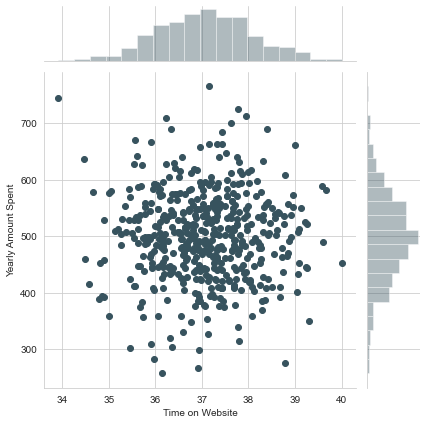

In [22]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

#### More time on App, more money spent.

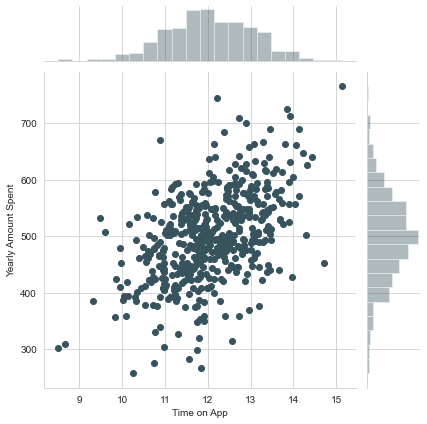

In [21]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

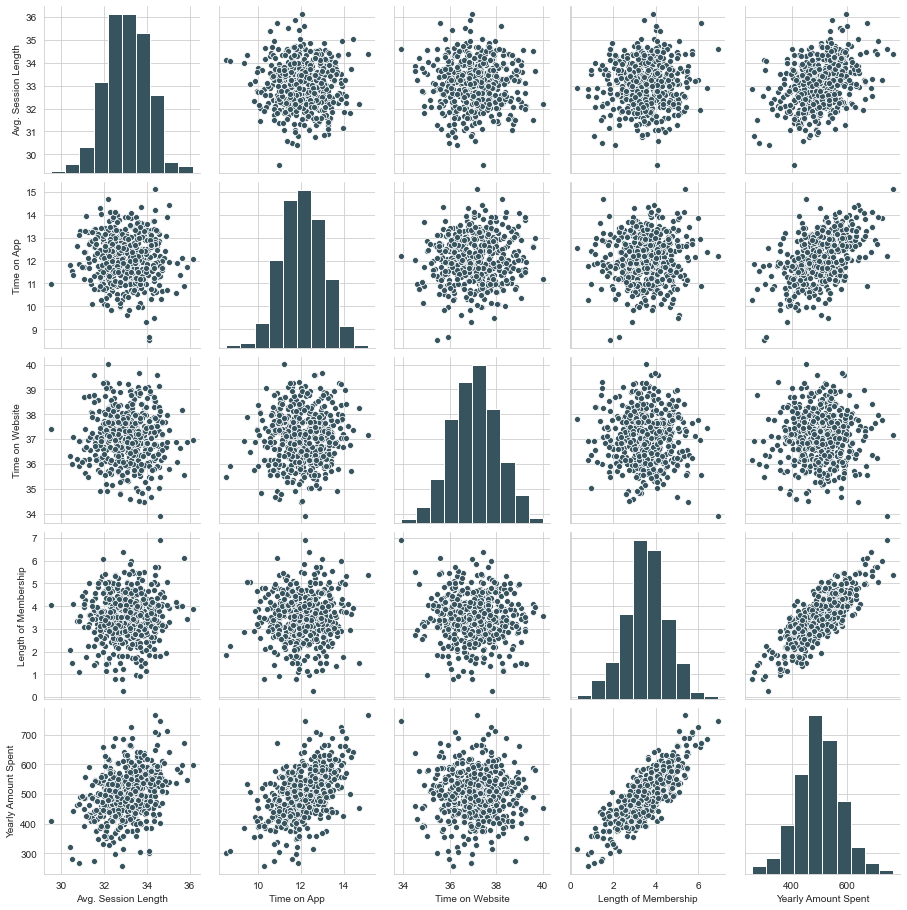

In [23]:
sns.pairplot(customers)

#### From above pairplot we can see that the 'Yearly amount spent' and 'Length of menbership' are most correlated.
**Created a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

/Users/sohamshinde/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


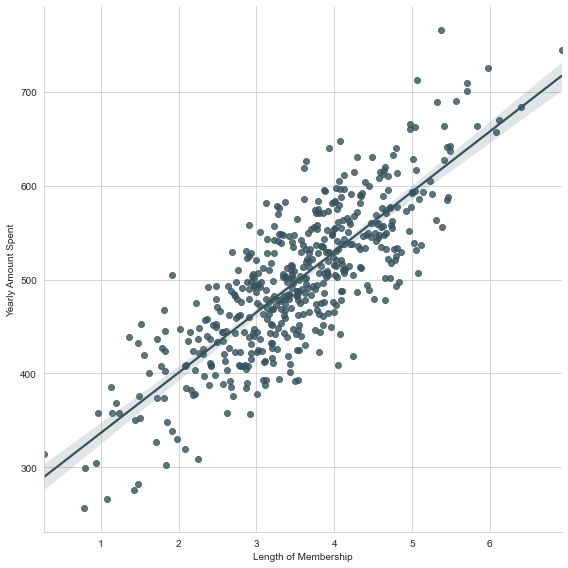

In [39]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,size=8)

# Split into Training and Testing dataset

Predicting y (Yearly amount spent) with dependent variables X (Time on App and website, Session length, length of membership) 
For this purpose I have to stored variables in y and X as done below

In [35]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

#### Importing libraries for splitting data into train and test dataset

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Training Model

In [45]:
# We have to import Linear regression from sklearn
from sklearn.linear_model import LinearRegression

#### Creating instance for linear model

In [44]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

#### Print coefficients of model

In [49]:
print('The coefficients are:\n',lm.coef_)

The coefficients are:
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data
#### Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [50]:
predictions = lm.predict(X_test)

#### Create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'y-Predicted')

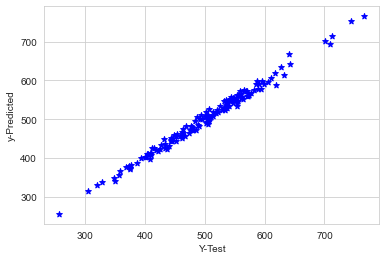

In [67]:
plt.scatter(y_test,predictions,marker='*',color='Blue')
plt.xlabel('Y-Test')
plt.ylabel('y-Predicted')

# Evaluating Model

#### Let's evaluate model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [69]:
from sklearn import metrics

In [73]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions))
print('Mean Square Error:',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

Mean Absolute Error: 7.228148653430853
Mean Square Error: 79.81305165097487
Root Mean Squared Error: 2.688521648309876


# Residuals

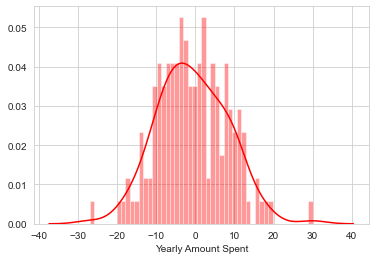

In [75]:
sns.distplot((y_test-predictions),bins=50,color='Red');

# Conclusion
We still want to figure out the answer to the original question, do we focus on Mobile App or Website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [82]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**The above mentioned coefficients tell us the following:**
- Holding all parameters fixed, 1 unit increase in **Avg. Session Length time** increases **25.98** dollars spent by customer
- Holding all parameters fixed, 1 unit increase in **Time on App** increases **38.59** dollars spent by customer 
- Holding all parameters fixed, 1 unit increase in **Time on website** increases **0.19** dollars spent by customer
- Holding all parameters fixed, 1 unit increase in **Length on Membership** increases **61.27** dollars spent by customer

Above numbers tells us that, **we should focus on buiding the app, but also we can direct customers from the website.** We can see customers spends 38.59 dollars when they spend 1 min on App. We should also consider other factors than

# Extra Work
### Time spent on App and Website are closely same and does not affect Membership Length
### It does affect the spending of the customer 
### Customers are more likely to buy clothes through App than Website

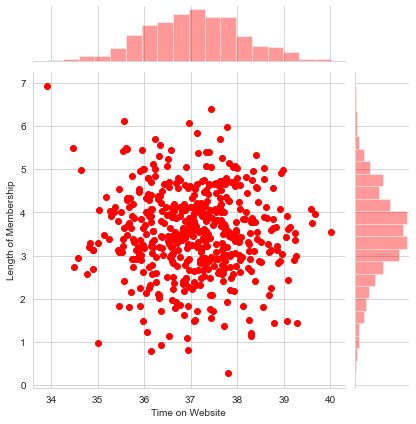

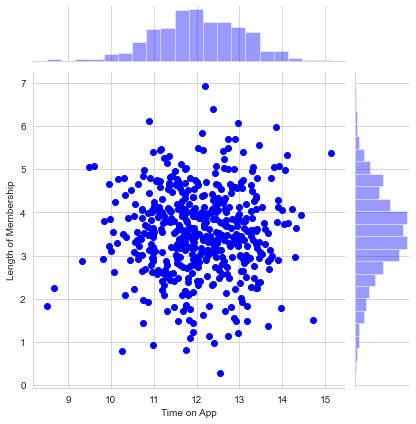

In [91]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=customers,color='Red')
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,color='Blue')

# Thank you!